In [1]:
import sys
import numpy as np
import scipy

sys.path.append(r'//Users/humphreys/Repositories/')

from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)
from analysis.lib.nv import nvlevels; reload(nvlevels)
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

/Users/humphreys/Documents/teamdiamond/data
reloaded
reloaded
reloaded


In [2]:
def create_plottables_energies(Ex,Ey,Strain_start,Strain_end,pts,B_field=[0.,0.,0.]):
    Strain = Ex-Ey
    ExZero = (Ex+Ey)/2 
    EyZero = (Ex+Ey)/2 

    result_list = [range(pts),range(pts),range(pts),range(pts),range(pts),range(pts)] #i know, this is ugly
    Strainarray = np.linspace(Strain_start,Strain_end,pts)
    for i in range(pts):

        result_list[0][i],result_list[1][i],result_list[2][i],result_list[3][i],result_list[4][i],result_list[5][i] = nvlevels.get_ES_ExEy(ExZero+Strainarray[i]/2,EyZero-Strainarray[i]/2,B_field=B_field)
    return Strainarray,result_list

In [3]:
def plot_plottables_energies(Strainarray,result_list,ax=None):
    if ax == None:
        fig = plt.plot()
        ax = plt.subplot()

    legend_list = ["E-'","E+'",'Ey','Ex','A1','A2']
    if len(legend_list) == len(result_list):
        for res,legend in zip(result_list,legend_list):
            plt.plot(Strainarray,res,label = legend)
    else:
        for res in result_list:
            plt.plot(Strainarray,res)
        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Frequency (GHz)')
    plt.xlabel('Strain splitting (GHz)')
    plt.show()
    plt.close("all")

In [4]:
from itertools import cycle

def plot_plottables_transitions(Strainarray,result_list,ax=None):
    
    plot_style = {'msp1' : '--', 'msm1': '-', 'ms0' : '-'}

    if ax == None:
        fig = plt.plot()
        ax = plt.subplot()

    if type(result_list) == np.ndarray:
        for res in result_list:
            plt.plot(Strainarray,res)
    elif type(result_list) == dict:
        for key in result_list:
            for i,res in enumerate(result_list[key]):
                if i == 0: 
                    baseline, = plt.plot(Strainarray,res,label = key, ls=plot_style[key])
                else:
                    plt.plot(Strainarray,res, c=baseline.get_color(), ls=plot_style[key])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Frequency (GHz)')
    plt.xlabel('Strain splitting (GHz)')
    plt.show()
    plt.close("all")

In [5]:
reload(nvlevels)
def create_plottables_transitions(Ex,Ey,Strain_start,Strain_end,pts,B_field=[0.,0.,0.],m0=True,m1=True,p1=True,return_dict = False):

    ExZero = (Ex+Ey)/2 
    EyZero = (Ex+Ey)/2 
    
    Strainarray = np.linspace(Strain_start,Strain_end,pts)
    
    if return_dict:
        transition_results = {}
        trans_keys = []
        if m0:
            trans_keys.append('ms0')
            transition_results['ms0'] = np.empty([2,pts])
        if m1:
            trans_keys.append('msm1')
            transition_results['msm1'] = np.empty([3,pts])
        if p1:
            trans_keys.append('msp1')
            transition_results['msp1'] = np.empty([3,pts])
    else:
        transition_results = np.empty([2*bool(m0)+3*bool(m1)+3*bool(p1),pts])   
    
    for i in range(pts):
            slice_list = nvlevels.get_transitions_ExEy(ExZero+Strainarray[i]/2,EyZero-Strainarray[i]/2,B_field=B_field,return_dict = return_dict, show_FB_E_transitions=False,show_FB_A_transitions=False, show_E_prime_flip_transitions=False, show_ms0_transitions = m0, show_m1_transitions = m1, show_p1_transitions = p1)
            if not return_dict:
                transition_results[:,i] = np.sort(slice_list)
            else:
                for key in trans_keys:
                    transition_results[key][:,i] = np.sort(slice_list[key])

    return Strainarray,transition_results

In [6]:
reload(nvlevels)
def create_plottables_eigenstates(Ex,Ey,Strain_start,Strain_end,pts,B_field=[0.,0.,0.]):
    
    EZero = (Ex+Ey)/2 

    Strainarray = np.linspace(Strain_start,Strain_end,pts)
        
    transitions = np.zeros([6,6,pts])

    for ii in range(pts):
        ES, v = nvlevels.get_ES_SpinComp_ExEy(EZero+Strainarray[ii]/2,EZero-Strainarray[ii]/2,B_field=B_field)
        if ii == 0:
            v = v[:,np.argsort(ES)]
            ES = np.sort(ES)
            print np.round(np.power(np.abs(v),2),3)
            print ES
            
            transitions[:,:,ii] = np.power(np.abs(v.T),2)
        else:
            for col in v.transpose(): 
                abs_sq_col = np.power(np.abs(col),2)
                transitions[np.argmin(np.sum(np.power(np.tile(abs_sq_col, (6,1)) - transitions[:,:,ii-1],2),1)),:,ii] = abs_sq_col
    
    return Strainarray,transitions

In [7]:
def plot_plottables_eigenstates(Strainarray,transitions):
    
    legend_list = ["E-'","E+'",'Ey','Ex','A1','A2']

    fig = plt.plot()
    for x in range(np.shape(transitions)[0]):
        ax = plt.subplot(np.shape(transitions)[0],1,x+1)

        if x == 0:
            for y,label in zip(range(np.shape(transitions)[1]),legend_list):
                plt.plot(Strainarray,transitions[x,y,:], label=label)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
        else:
            for y in range(np.shape(transitions)[1]):
                plt.plot(Strainarray,transitions[x,y,:])
        plt.ylabel('Component')
        if x == np.shape(transitions)[0]-1:
            plt.xlabel('Strain splitting (GHz)')
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10.5, 15, forward=True)      
    plt.show()
    plt.close('all')

In [8]:
reload(nvlevels)
def create_plottables_transitions_strengths(Ex,Ey,Strain_start,Strain_end,pts,B_field=[0.,0.,0.],m0=True,m1=True,p1=True):
    
    Strain = Ex-Ey
    ExZero = (Ex+Ey)/2 
    EyZero = (Ex+Ey)/2 
    
    Strainarray = np.linspace(Strain_start,Strain_end,pts)

    trans_keys = []
    if m0:
        trans_keys.append('ms0')
    if m1:
        trans_keys.append('msm1')
    if p1:
        trans_keys.append('msp1')
        
    transitions = {}
    for key in trans_keys:
        transitions[key] = {}
        transitions[key]['strength'] = np.empty([6,pts])
        transitions[key]['freq'] = np.empty([6,pts])
        
    for ii in range(pts):
        slice_list = nvlevels.get_optical_transition_strengths_ExEy(ExZero+Strainarray[ii]/2,EyZero-Strainarray[ii]/2,B_field=B_field,
                    show_ms0_transitions=m0,show_m1_transitions=m1,show_p1_transitions=p1)
        
        for key in trans_keys:
            transitions[key]['strength'][:,ii] = slice_list[key]['strength']
            transitions[key]['freq'][:,ii] = slice_list[key]['freq']
            
    return Strainarray,transitions

In [9]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_plottables_transitions_strengths(Strainarray,result_list,ax=None,log_scale =False):
    
    color_map_key = {'msp1' : 'Blues', 'msm1': 'Greens', 'ms0' : 'Reds'}

    if ax == None:
        fig = plt.plot()

        ax = plt.subplot()

    for key in result_list:
        
        for ii in range(np.shape(result_list[key]['freq'])[0]):

            points = np.array([Strainarray, result_list[key]['freq'][ii,:]]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            if not log_scale:
                lc = LineCollection(segments, cmap=plt.get_cmap(color_map_key[key]),norm=plt.Normalize(vmin=0,vmax=1))
                lc.set_array(result_list[key]['strength'][ii,:])
            else:
                lc = LineCollection(segments, cmap=plt.get_cmap(color_map_key[key]),norm=plt.Normalize(vmin=-3,vmax=0))
                result_list[key]['strength'][ii,(result_list[key]['strength'][ii,:] == 0)] = 1e-5
                lc.set_array(np.log10(result_list[key]['strength'][ii,:]))
            lc.set_linewidth(1)
            ax.add_collection(lc)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel('Frequency (GHz)')
    plt.xlabel('Strain splitting (GHz)')

    ax.autoscale_view(True,True,True)
    
    plt.show()
    plt.close("all")

In [34]:
reload(nvlevels)
es = nvlevels.get_ES(E_field=[0.0,0.,0.0],B_field=[0.,0.,00.])

order = np.argsort(es[0])
energies = es[0][order]
conventional_energy_order = [1,0,3,2,4,5]
#Note that code goes as ["Ex'","Ey'","Ex",'Ey','A1','A2']
sorted_eigenstates = (es[1][:,order])[conventional_energy_order]

print ["Ey' (E1)","Ex' (E1)","Ey",'Ex','A1','A2']
print(energies)
print(np.round(np.power(np.abs(sorted_eigenstates),2),3))

["Ey' (E1)", "Ex' (E1)", 'Ey', 'Ex', 'A1', 'A2']
[-6.77245699 -6.77245699 -2.88087634 -2.88087634  2.29333333  5.37333333]
[[ 0.     0.999  0.     0.001  0.     0.   ]
 [ 0.999  0.     0.001  0.     0.     0.   ]
 [ 0.     0.001  0.     0.999  0.     0.   ]
 [ 0.001  0.     0.999  0.     0.     0.   ]
 [ 0.     0.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.     1.   ]]


In [11]:
reload(nvlevels)
es = nvlevels.get_GS(E_field=[0.,0.,0.],B_field=[00.,0.,400.])

order = np.argsort(es[0])
energies = es[0][order]
#Note that code goes as ["ms = 0, E_x (E+ + E-), E_y i(E+ - E-)"]
#These are superpositions of +/-!
sorted_eigenstates = (es[1][:,order])
print ["A_0", "E_x (E+ + E-)", "E_y i(E+ - E-)"]
print(energies)
print(np.round(np.power(np.abs(sorted_eigenstates),2),3))

['A_0', 'E_x (E+ + E-)', 'E_y i(E+ - E-)']
[-1.92      -0.1596996  2.0796996]
[[ 1.   0.   0. ]
 [ 0.   0.5  0.5]
 [ 0.   0.5  0.5]]


Note that the spin-spin interaction acts to slightly mix the Ey' and Ex' (ms = $\pm$1) states and the Ey and Ex (ms = 0) states.

### New code for giving states in spin eigenbasis

[-7.09120349  5.6944207  -0.88321722  2.71531768 -7.1978459  -4.87747178]
[ 6.08681802 -8.39847122  2.32370744 -0.8823071  -5.895761   -4.87398615]


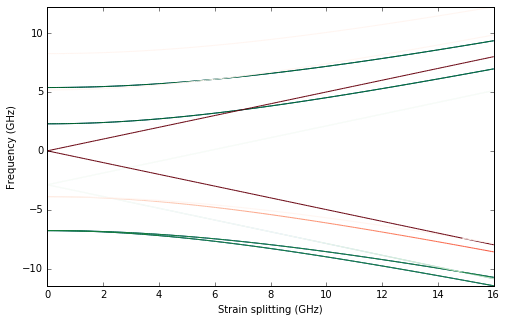

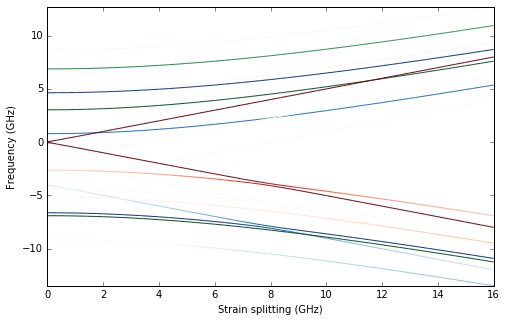

In [41]:
print nvlevels.get_ES_SpinComp(E_field=[2.0,0.,0.0],B_field= [0.,0.,0.],trans_A_levels = False, conv_order = True)[0]
print nvlevels.get_ES_SpinComp(E_field=[2.0,0.,0.0],B_field= [0.,0.,400.],trans_A_levels = False, conv_order = True)[0]

a,b = create_plottables_transitions_strengths(0,0,0,16,200,B_field=[0.,0.,0.],m0=True,m1=True,p1=True)
plot_plottables_transitions_strengths(a,b,ax=None,log_scale = True)

a,b = create_plottables_transitions_strengths(0,0,0,16,200,B_field=[0.,0.,400.],m0=True,m1=True,p1=True)
plot_plottables_transitions_strengths(a,b,ax=None,log_scale = True)

["E-'", "E+'", 'Ey', 'Ex', 'A1', 'A2']
[-8.03066517 -5.51575883 -2.93482537 -2.82543661  1.91271993  5.75396604]
[[ 0.999  0.     0.     0.001  0.     0.   ]
 [ 0.     0.997  0.003  0.     0.     0.   ]
 [ 0.     0.002  0.589  0.409  0.     0.   ]
 [ 0.     0.002  0.407  0.591  0.     0.   ]
 [ 0.     0.     0.     0.     0.901  0.099]
 [ 0.     0.     0.     0.     0.099  0.901]]


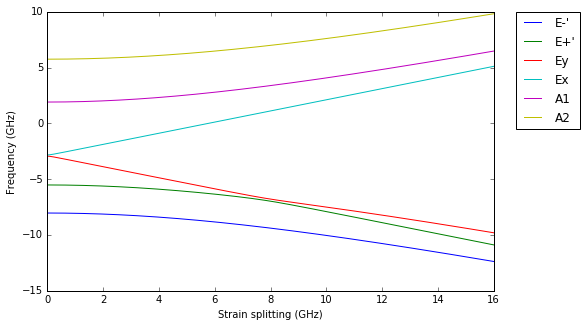

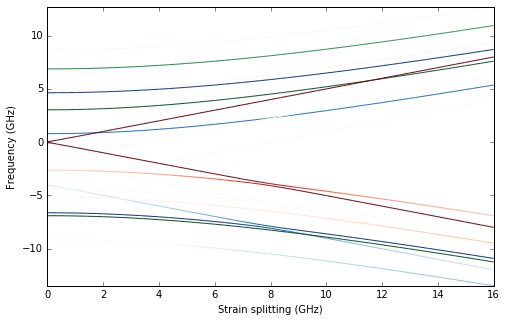

In [36]:
reload(nvlevels)
B_field = [0.,0.,400.]

es = nvlevels.get_ES_SpinComp(E_field=[0.01,0.,0.0],B_field= B_field,trans_A_levels = False, conv_order = True)

order = np.argsort(es[0])
energies = es[0][order]
conventional_energy_order = [0,1,3,2,4,5]
#Note that code goes as ["E-'","E+'","Ex",'Ey','A1','A2']
#If trans_A_levels flag code goes as ["E-'","E+'","Ex",'Ey','A-','A+']
sorted_eigenstates = (es[1][:,order])#[conventional_energy_order]

print ["E-'","E+'","Ey",'Ex','A1','A2']
print(energies)
print(np.round(np.power(np.abs(sorted_eigenstates),2),3))

matplotlib.rcParams['figure.figsize'] = (8, 5)
    
x,y = create_plottables_energies(0,0,0,16,200,B_field=B_field)
plot_plottables_energies(x,y)

#x,y = create_plottables_transitions(0,0,0,16,200,B_field=B_field,m0=True,m1=True,p1=True,return_dict = True)
#plot_plottables_transitions(x,y)

a,b = create_plottables_transitions_strengths(0,0,0,16,200,B_field=B_field,m0=True,m1=True,p1=True)
plot_plottables_transitions_strengths(a,b,ax=None,log_scale = True)

In [13]:
reload(nvlevels)
es = nvlevels.get_GS_SpinComp(E_field=[3.5,0.,0.],B_field=[0.,0.,400.])

order = np.argsort(es[0])
energies = es[0][order]
#Note that code goes as ["ms = 0, E_+, E_-"]
#These are superpositions of +/-!
conventional_energy_order = [0,2,1]
sorted_eigenstates = (es[1][:,order])[conventional_energy_order]
print ["A_0", "E_-", "E_+"]
print(energies+1.92)
print(np.round(np.power(np.abs(sorted_eigenstates),2),3))

['A_0', 'E_-', 'E_+']
[ 0.         1.7603004  3.9996996]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


[[ 0.999  0.     0.     0.001  0.     0.   ]
 [ 0.     0.997  0.003  0.     0.     0.   ]
 [ 0.     0.002  0.503  0.495  0.     0.   ]
 [ 0.     0.002  0.494  0.504  0.     0.   ]
 [ 0.     0.     0.     0.     0.901  0.099]
 [ 0.     0.     0.     0.     0.099  0.901]]
[-8.03065569 -5.51574896 -2.93390964 -2.82635243  1.91270921  5.75395751]


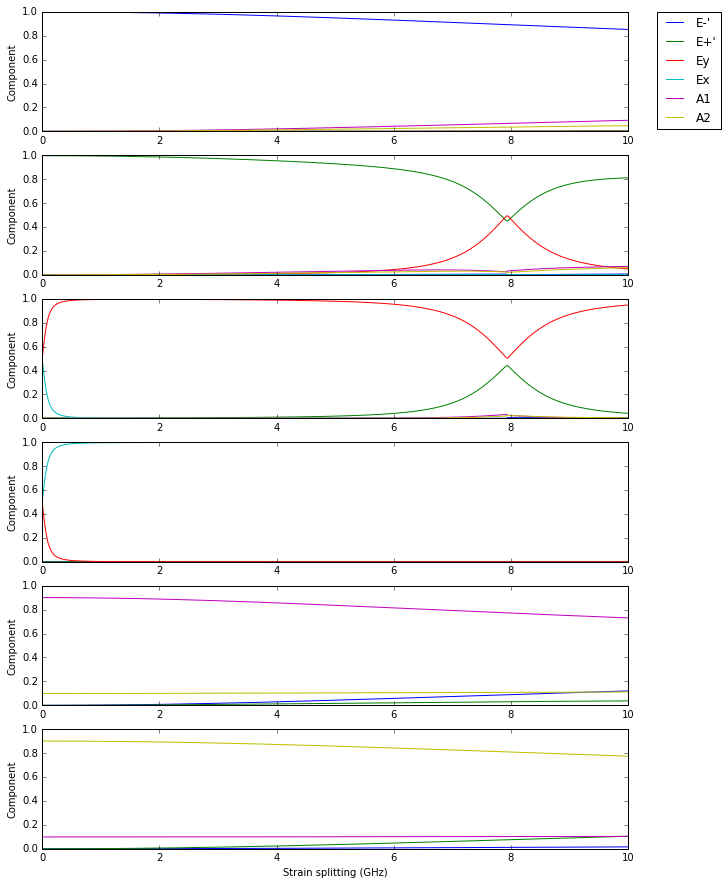

In [14]:
strainArray,transitions =create_plottables_eigenstates(0.0,0.0,0.001,10,400,B_field=[0.,0.,400.])

plot_plottables_eigenstates(strainArray,transitions)

### NV levels without a magnetic field

In [15]:
B = [0.,0.,0.]
Ex = 63
Ey = 57.5
Strain = Ex-Ey
Ex = (Ex+Ey)/2 + Strain/2
Ey = (Ex+Ey)/2 - Strain/2

print Ex
print Ey

print nvlevels.get_ES_ExEy(Ex,Ey,20,B_field=B)


63.0
57.5
[ 55.56161571  55.7723708   57.5         63.          66.18447774
  69.10350983]


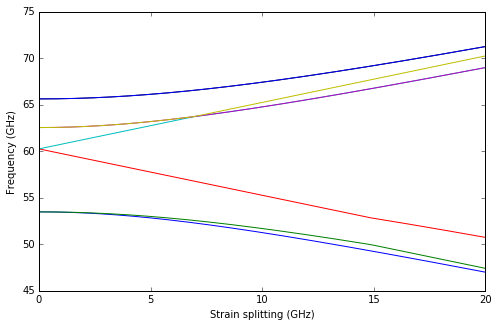

distance between the two states


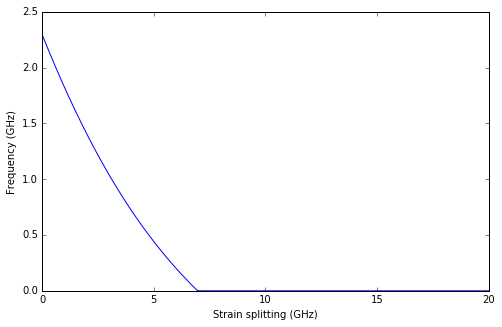

In [16]:
### need the level distance of A1 and Ex.

x,y = create_plottables_transitions(63,57.5,0,20,200)
plot_plottables_energies(x,y)

### plot the distance between Ex and A1
print 'distance between the two states'
plot_plottables_energies(np.array(x),[np.array(y[4])-np.array(y[3])])


In [17]:
x,y = create_plottables_transitions(63,57.5,0,12,5)

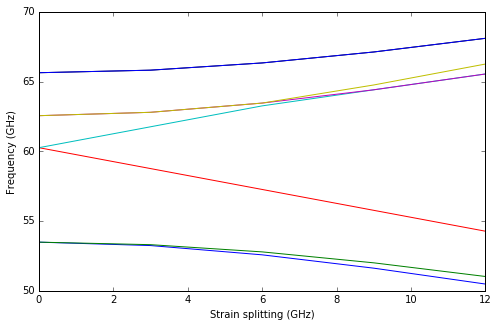

In [18]:
plot_plottables_energies(x,y)

### NV levels including magnetic field

In [19]:
#### Sil2 of 111 no 2.
B = [0.,0.,421.5]
Ex = 52.99
Ey = 47.53
print Ex-Ey

5.46


In [20]:
reload(nvlevels)
x,y = create_plottables_energies(Ex,Ey,0,15,200,B_field = B)


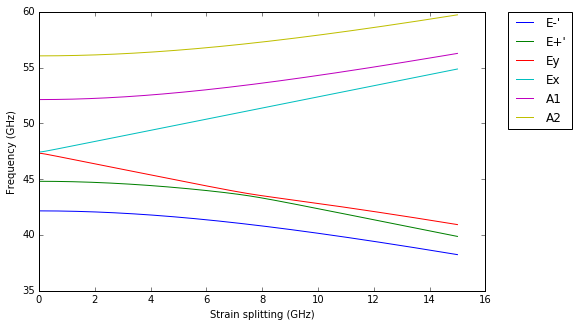

In [21]:
plot_plottables_energies(x,y)
### plot the distance between Ex and A1


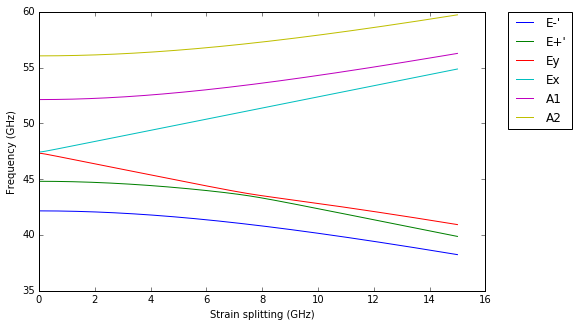

distance between the two states


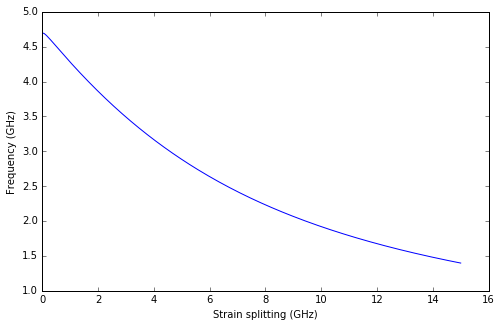

In [22]:
reload(nvlevels)
plot_plottables_energies(x,y)
### plot the distance between Ex and A1
print 'distance between the two states'
plot_plottables_energies(np.array(x),[np.array(y[4])-np.array(y[3])])

In [23]:
reload(nvlevels)
nvlevels.get_transitions_ExEy(Ex,Ey,show_FB_E_transitions=False, 
                            show_FB_A_transitions=False,B_field=[0.,0.,421.5])

array([ 40.32475107,  42.68451799,  42.95077628,  45.31054319,
        47.55486051,  51.70348095,  52.99688104,  54.06324786,
        55.48971633,  57.84948324])

In [24]:
reload(nvlevels)
x,y = create_plottables_transitions(Ex,Ey,0,10,100,B_field=[0.,0.,421.5],m1=True,p1=False)

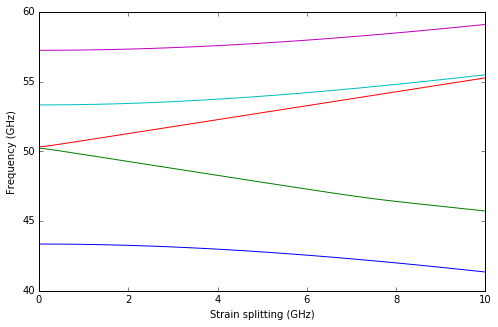

In [25]:
plot_plottables_energies(x,y)

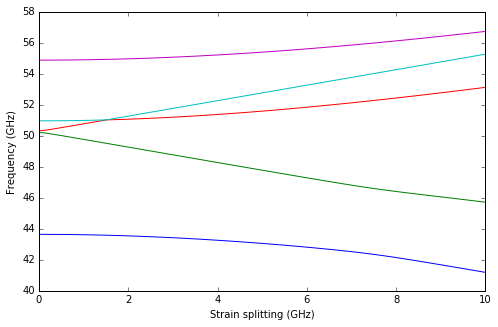

In [26]:
reload(nvlevels)
x,y = create_plottables_transitions(Ex,Ey,0,10,100,B_field=[0.,0.,421.5],m1=False,p1=True)
plot_plottables_transitions(x,y)

In [27]:
from matplotlib import pyplot as plt

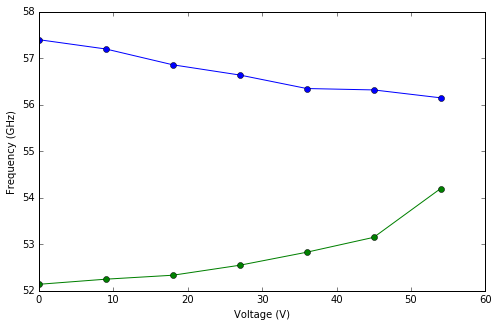

In [28]:
fig = plt.figure()
ax = plt.subplot()
Ex = [57.4,57.2,56.86,56.64,56.35,56.32,56.15]
Ey = [52.14,52.25,52.335,52.55,52.83,53.15,54.2]
Voltage = [0,9,18,27,36,45,54]

plt.plot(Voltage,Ex,marker='o')
plt.plot(Voltage,Ey,marker='o')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency (GHz)')